In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from numba import jit
import model
import importlib
model = importlib.reload(model)

In [2]:
@jit(nopython=True)
def harmonic(theta, f_a, T, params):
    m = params[0]
    return 0.5 * m**2 * f_a**2 * theta**2

@jit(nopython=True)
def harmonic_deriv(theta, f_a, T, params):
    m = params[0]
    return m**2 * theta

model.add_pot("harmonic", harmonic, harmonic_deriv)

f_a = 3e14
H_inf = 2e10

In [3]:
def calc_end_time(m_a, Gamma_phi, num_osc):
    t_osc = 1/(2*m_a) if Gamma_phi >= m_a else 2/(3*m_a)
    axion_period = 2*np.pi/m_a
    t_axion = t_osc + axion_period * num_osc
    return t_axion

In [4]:
Gamma_phi_s = np.geomspace(1e6, 1e10, 31)
m_a_s = np.geomspace(1e6, 1e10, 30)
n = 15
eta_B_s = np.array([[model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, "harmonic", (m_a,),
                    bg_kwargs=dict(end=calc_end_time(m_a, Gamma_phi, n), inc=2*np.pi / m_a * n)) 
                     for m_a in m_a_s] for Gamma_phi in tqdm(Gamma_phi_s)])

/home/jana/Documents/master-project/any_potential/model.py:148: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/any_potential/model.py:152: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/any_potential/model.py:148: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/any_potential/model.py:152: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/any_potential/model.py:152: RuntimeWarning: overflow encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/any_potential/model.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - G

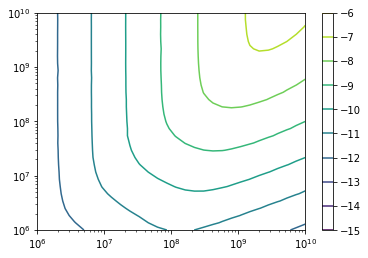

In [8]:
plt.contour(m_a_s, Gamma_phi_s, np.log10(eta_B_s), np.arange(-15,-6 + 1,1))
plt.xscale("log")
plt.yscale("log")
plt.colorbar()